In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import FuncFormatter
import os

rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Times New Roman'],'size':14})#,'weight':'bold'})
rc('xtick',**{'labelsize':16})
rc('ytick',**{'labelsize':16})
rc('axes',**{'labelsize':18,'titlesize':18})

In [2]:
# Indices 0:t 1-3:x 4-6:v 7:E 8-10:L 11:r 12:|L| 13:omega? 14:eccen 15-17:evect
# out2 0:rcyl 1:vcyl

In [3]:
ellipse1 = np.loadtxt("orbit.dat").T
np.linalg.norm(ellipse1[3])

0.0

In [4]:
def test_ellipse(dat_name):
    dat_arr = np.loadtxt(dat_name).T
    z_err = np.linalg.norm(dat_arr[3])
    if z_err > 0:
        print("Error: nonzero z coords, norm = {}".format(z_err))
        return
    else:
        plt.plot(dat_arr[1], dat_arr[2])
        plt.xlabel("x")
        plt.ylabel("y")
        if dat_name == "orbit.dat":
            plt.title("orbit")
        else:
            plot_title_names = dat_name.split('_')
            plt.title("Initial Values: R = {}, E = {}, Lz = {}".format(*plot_title_names[0:3]))
    return

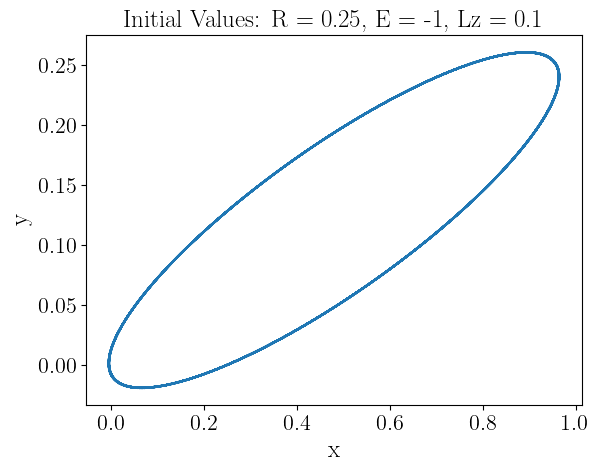

In [5]:
test_ellipse("0.25_-1_0.1_.dat")

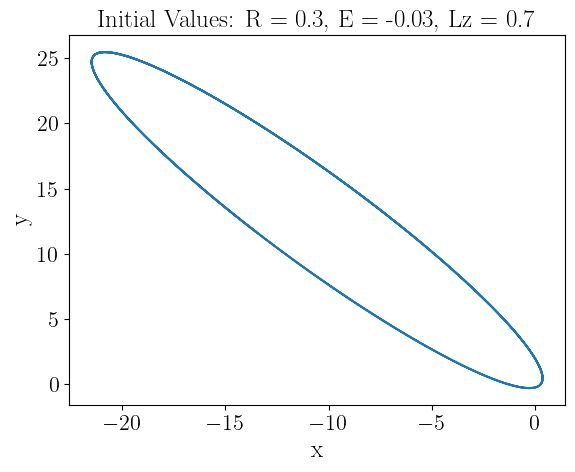

In [6]:
test_ellipse("0.3_-0.03_0.7_.dat")

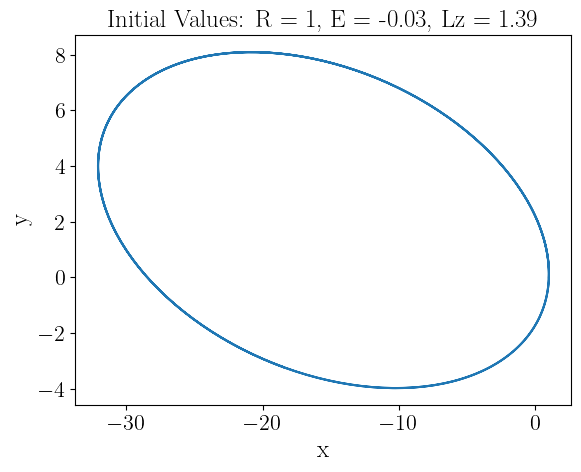

In [7]:
test_ellipse("1_-0.03_1.39_.dat")

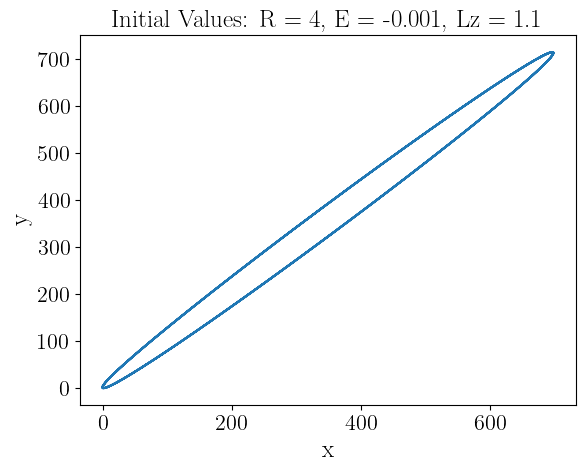

In [8]:
test_ellipse("4_-0.001_1.1_.dat")

# Part 2

In [9]:
from scipy.fft import rfft, fftfreq
perturb = np.loadtxt("orbit.dat").T

In [10]:
def out_r(dat_arr):
    return dat_arr[1]**2 + dat_arr[2]**2 + dat_arr[3]**2

In [11]:
#out_r_mean = out_r(perturb)
#out_r_mean -= np.mean(out_r_mean)

#N = len(perturb[0])
#from scipy.signal import blackman
#w = blackman(N)
#fft = scipy.fft.rfft(out_r_mean*w)
#xf = scipy.fft.fftfreq(N, perturb[0][-1] / N)

In [12]:
#plt.semilogy(xf[1:N//2], 2.0/N * np.abs(fft[1:N//2]), '-b')
#plt.semilogy(xf[1:N//2], 2.0/N * fft[1:N//2])
#plt.semilogy(2.0/N * fft[1:N//2])

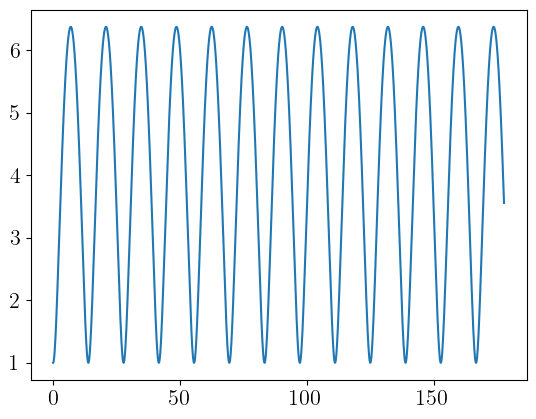

In [13]:
plt.plot(perturb[0],out_r(perturb))

def find_r_freq(dat_file):
    # Get T axis
    dat_arr = np.loadtxt(dat_file).T
    t_arr = dat_arr[0]
    N = len(t_arr)
    r_arr = out_r(dat_arr)

    # Remove DC Component, Filter
    r_arr -= np.mean(r_arr)
    r_arr *= blackman(N)

    # Get fft axes
    r_fft = rfft(r_arr)
    tf = fftfreq(N, t_arr[-1] / N)

    return tf[1:N // 2][np.argmax(r_fft)]

In [14]:
#find_r_freq("orbit.dat")

In [15]:
def out_phase(dat_arr):
    return np.arctan(dat_arr[2] / dat_arr[1])

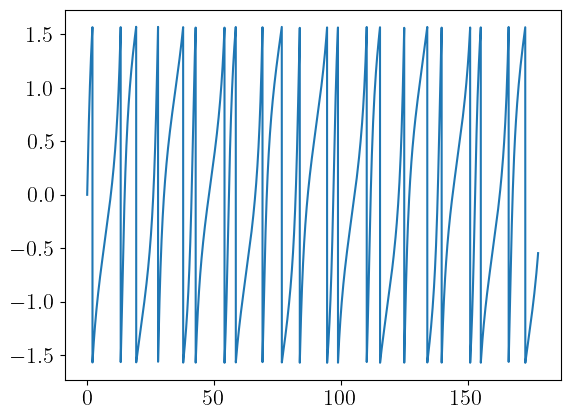

In [16]:
plt.plot(perturb[0], out_phase(perturb))

2 am perihelion advance thoughts: Find minima in r(t) @ t_min, add theta_new to orbit.dat, define prec to be phi(t_min,i+1) - phi(t_min,i), report avg value.

In [17]:
import pandas as pd

In [18]:
r_phi_names = ["var", "iter", "t", "norbit", "value", "ang_freq"]
df_005 = pd.read_csv("kappa/0.05.dat", sep=" ", header=None)
df_005.columns = r_phi_names

In [19]:
df_005_r = df_005[df_005["var"] == "rad:"]
df_005_phi = df_005[df_005["var"] == "phi:"]

In [20]:
df_005_r["ang_freq"].mean()

0.5726120000000001

In [21]:
df_005_phi["ang_freq"].mean()

0.5303295833333334

In [22]:
# Find perihelion prec
min_idxs = np.array(df_005_r["iter"])
min_idxs

array([ 73740, 147480, 221219, 294959, 368699, 442439, 516179, 589919,
       663658, 737398, 811138, 884878, 958618])

In [23]:
# Indices 0:t 1-3:x 4-6:v 7:E 8-10:L 11:r 12:|L| 13:omega? 14:eccen 15-17:evect 18:phase
# out2 0:rcyl 1:vcyl

In [24]:
#dat_names = ["t", "x", "y", "z", "vx", "vy", "vz", "E", "L", "r", "|L|", "omega", "eccen", "eccenx", "ecceny", "eccenz", "phase"]
kappa_arr = np.loadtxt("kappa/0.050000_orbit.dat").T
phi_prec = kappa_arr[18][min_idxs // 100]
phi_prec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
kappa_arr[0]

array([0.00000e+00, 1.00001e-02, 2.00005e-02, ..., 1.48960e+02,
       1.48979e+02, 1.48999e+02])